# Pyber Ride Sharing 2018

## Analysis
### --- The XY scatter does not show a strong correlation between the number of rides and the average fare amount.

### --- Although, higher average fare prices show a tendency to occur in the rural  types. This might be related to the tendency of rural areas not being as densly populated as urban areas. This can contribute to an increase in travel distance and time.

### --- I would recommend metrics that are similar to the ones created for this analysis, but not without some type of clustering to account for geographic constraints prior.

##  

In [311]:
%matplotlib notebook


In [312]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os


def Grab_file(folder_path, file_name, new_col_name, append):
    final_table, temp_table, temp_list, temp_df, temp_col = {}, [], [], [], []
    j , i = 0,0

    for file in file_name:
        temp_input = open(folder_path + file_name[j])
        temp_df = pd.DataFrame(pd.read_csv(temp_input))
        temp_input.close()
        if  len(new_col_name) !=0:
            temp_col = [file_name[j][9:13] for x in temp_df.values]
            temp_df[new_col_name] = pd.Series(temp_col).values
        temp_table.append(temp_df)
        j+=1

    if append == True:
        final_table = pd.concat(temp_table)
        return final_table
    else:
        return temp_table

In [313]:
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"
import_files = [city_data_to_load ,ride_data_to_load]

x_path = 'data/'
city_table = {}
ride_table = {} 

city_table, ride_table = Grab_file(x_path, import_files,"", False)


pyber_combo = pd.merge(city_table, ride_table, how="left",on="city")
pyber_combo = pyber_combo.drop_duplicates(keep='first')
pyber_combo.sort_values(by=["type", "city"],axis=0, inplace=True,ascending=True)
pyber_combo = pyber_combo.reset_index()
pyber_combo = pyber_combo[['city','date','fare','ride_id', 'driver_count','type']]

pyber_combo.head()

,city,date,fare,ride_id,driver_count,type
0,Bradshawfurt,2018-03-06 21:44:53,19.74,6080367372860,7,Rural
1,Bradshawfurt,2018-03-24 18:53:18,57.51,2301998876294,7,Rural
2,Bradshawfurt,2018-03-24 07:34:03,19.89,7867402022145,7,Rural
3,Bradshawfurt,2018-02-18 22:21:26,34.32,8881996813087,7,Rural
4,Bradshawfurt,2018-04-08 13:46:03,55.19,1742954306812,7,Rural


In [314]:
#Average Fare Per City
average_fare = pyber_combo.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {'fare': 'avg_fare'})

#Total Number of Rides Per City
total_rides = pyber_combo.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {'ride_id': 'total_rides'})

#Total Drivers
total_drivers = pyber_combo[["city", "driver_count"]].drop_duplicates("city")

#City Type
city_type = pyber_combo[["city", "type"]].drop_duplicates("city")
pyber_agg = pd.merge(pd.merge(pd.merge(average_fare, total_rides, on="city"), 
                             total_drivers, on="city"), city_type, on="city")

pyber_agg.head()

,city,avg_fare,total_rides,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


<IPython.core.display.Javascript object>


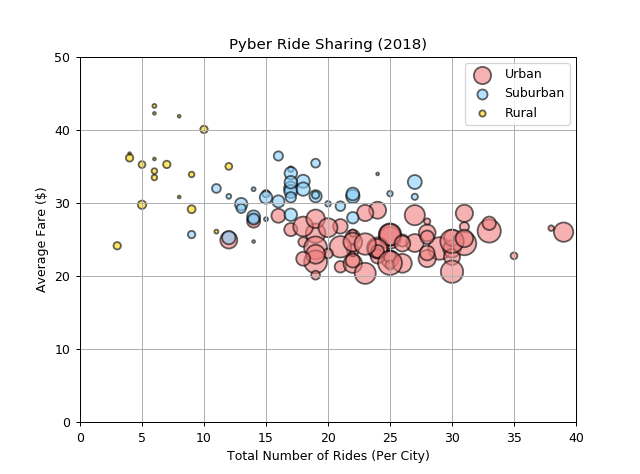

(0, 50)

In [315]:
#Bubble Plot Data
urban_grp = pyber_agg.loc[pyber_agg['type'] == 'Urban']
suburban_grp = pyber_agg.loc[pyber_agg['type'] == 'Suburban']
rural_grp = pyber_agg.loc[pyber_agg['type'] == 'Rural']

urb_rides = urban_grp['total_rides']
urb_avg_fare = urban_grp['avg_fare']
urb_drivers = urban_grp['driver_count']

sbn_rides = suburban_grp['total_rides']
sbn_avg_fare = suburban_grp['avg_fare']
sbn_drivers = suburban_grp['driver_count']

rural_rides = rural_grp['total_rides']
rural_avg_fare = rural_grp['avg_fare']
rural_drivers = rural_grp['driver_count']

#Bubble Plot
ax_1 = plt.scatter(x=urb_rides, y=urb_avg_fare, marker='o',
                       facecolor ='lightcoral', s=urb_drivers*5, label = 'Urban', 
                       alpha = 0.60, edgecolor = "k", linewidths = 1.45)    
ax_2 = plt.scatter(x=sbn_rides, y=sbn_avg_fare, marker='o', 
                          facecolor='lightskyblue', s=sbn_drivers*5, label = 'Suburban', 
                          alpha = 0.60, edgecolor = "black", linewidths = 1.45)    
ax_3 = plt.scatter(x=rural_rides, y=rural_avg_fare, marker='o',
                       facecolor='gold', s=rural_drivers*5, label = 'Rural', 
                       alpha = 0.60, edgecolor = "black", linewidths = 1.45)
plt.title("Pyber Ride Sharing (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.legend(loc="best")
plt.grid(True)
ax_1.figure.dpi=100
ax_2.figure.dpi=100
ax_3.figure.dpi=100
plt.figaspect(5)
ax_1.figure.tight_layout = True
ax_2.figure.tight_layout = True
ax_3.figure.tight_layout = True
plt.xlim(0, 40)
plt.ylim(0, 50)
#plt.savefig("../Images/Pyber_XY_Scatter.png")

<IPython.core.display.Javascript object>


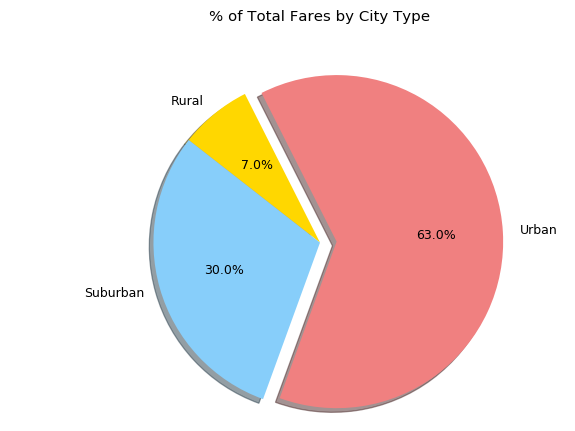

In [316]:
#Percent of Total Fares by City Type
total_fares = pyber_combo["fare"].sum()
urban_fare = pyber_combo.loc[pyber_combo["type"] == "Urban", "fare"].sum()
rural_fare = pyber_combo.loc[pyber_combo["type"] == "Rural", "fare"].sum()
suburban_fare = pyber_combo.loc[pyber_combo["type"] == "Suburban", "fare"].sum()


urban_fare_p = round(urban_fare/total_fares, 2) *100
rural_fare_p = round(rural_fare/total_fares, 2) *100
suburban_fare_p = round(suburban_fare/total_fares, 2) *100

# Pie chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fare_p, rural_fare_p, suburban_fare_p]
explode = (0.1, 0, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax1.axis('equal')  #ensure that pie is drawn as a circle.
fig1.suptitle("% of Total Fares by City Type")
fig1.dpi = 100
fig1.tight_layout= True
fig1.show()



#fig1.savefig("../Images/TotalShare_Fares_byType.png")

<IPython.core.display.Javascript object>


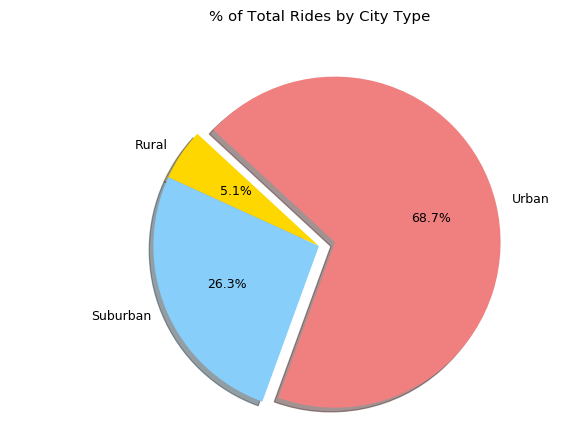

In [317]:
#Percent of Total Rides by City Type
final_total_rides = len(pyber_combo)
urban_rides = round(pyber_combo.loc[pyber_combo["type"] == "Urban", "ride_id"].count()/final_total_rides, 2) * 100
rural_rides = round(pyber_combo.loc[pyber_combo["type"] == "Rural", "ride_id"].count()/final_total_rides, 2) * 100
suburban_rides = round(pyber_combo.loc[pyber_combo["type"] == "Suburban", "ride_id"].count()/final_total_rides, 2) * 100

# Pie chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_rides, rural_rides, suburban_rides]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax2.axis('equal')  #ensures that pie is drawn as a circle.
fig2.suptitle("% of Total Rides by City Type")
fig2.dpi = 100
fig2.tight_layout = True
fig2.show()

#fig2.savefig("../Images/TotalShare_Rides_byType.png")

<IPython.core.display.Javascript object>


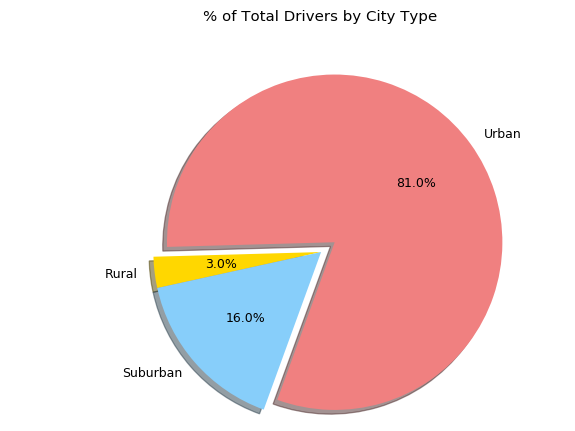

In [318]:
#Percent of Total Drivers by City Type
final_total_drivers = pyber_agg["driver_count"].sum()
urban_drivers = round(pyber_agg.loc[pyber_agg["type"] == "Urban", "driver_count"].sum()/final_total_drivers, 2)* 100
rural_drivers = round(pyber_agg.loc[pyber_agg["type"] == "Rural", "driver_count"].sum()/final_total_drivers, 2)* 100
suburban_drivers = round(pyber_agg.loc[pyber_agg["type"] == "Suburban", "driver_count"].sum()/final_total_drivers, 2)* 100
# Pie chart
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_drivers, rural_drivers, suburban_drivers]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig3, ax3 = plt.subplots()
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=250, colors = ["lightcoral", "gold", "lightskyblue"])
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig3.suptitle("% of Total Drivers by City Type")
fig3.dpi = 100
fig3.tight_layout
fig3.show()
#fig3.savefig("../Images/TotalShare_Drivers_byType.png")

plt.show()